In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [210]:
train = pd.read_csv('D:\\Dataset\\HR Analytics\\train.csv')
test = pd.read_csv('D:\\Dataset\\HR Analytics\\test.csv')

In [179]:
train.shape,test.shape

((54808, 14), (23490, 13))

# Checking missing value

In [180]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [181]:
train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [182]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Missing value treatment

In [184]:
train['education'].fillna(train['education'].mode()[0],inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(),inplace=True)


In [185]:
#removing unwanted features

In [186]:
train = train.drop(['employee_id','region'],axis=1)

In [187]:
#categorical data

In [188]:
data=pd.get_dummies(train,columns=['department','gender','recruitment_channel'],drop_first=True)

In [189]:
data.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,Master's & above,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,1
1,Bachelor's,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,1,0,0
2,Bachelor's,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,1,0,1
3,Bachelor's,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0
4,Bachelor's,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,1,0,0


In [190]:
data['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [191]:
#education should be in order
data['education'].replace("Master's & above",2,inplace=True)
data['education'].replace("Bachelor's",1,inplace=True)
data['education'].replace("Below Secondary",0,inplace=True)


In [192]:
data.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,1,0,0
2,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,1,0,1
3,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0
4,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,1,0,0


# Checking wheather data is balanced or not

Text(0, 0.5, 'Frequency')

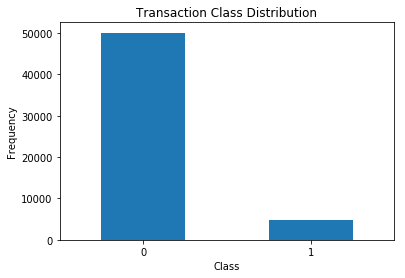

In [193]:
count_classes = pd.value_counts(data['is_promoted'], sort = True)

count_classes.plot(kind = 'bar', rot=1)

plt.title("Transaction Class Distribution")


plt.xlabel("Class")

plt.ylabel("Frequency")

In [208]:
#since data is unbalanced we have to balance it

In [194]:
x = data.drop('is_promoted',axis=1)
y= data.loc[:,'is_promoted']

In [195]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [196]:
os =  RandomOverSampler(ratio=0.8)
X_train_res, y_train_res = os.fit_sample(x, y)


In [198]:
X_train_res.shape,y_train_res.shape


((90252, 19), (90252,))

In [199]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 50140, 1: 4668})
Resampled dataset shape Counter({0: 50140, 1: 40112})


In [146]:
from sklearn.model_selection import cross_val_score


In [205]:
# search for an optimal value of K for KNN
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.890599892528536, 0.9201394465552533, 0.9152313965830199, 0.9222923982916431, 0.921653842004962, 0.9229492493644267, 0.9228580151472172, 0.923149939339217, 0.9233141496103994, 0.923022228747751, 0.9232411668977235, 0.9229857257386831, 0.9230587051220074, 0.9229857257386831, 0.9230222054422909, 0.9229492327176697, 0.9230587017926559, 0.9228215187968523, 0.9230404602761764, 0.9229309945305415, 0.9230769466384869, 0.9228580151472171, 0.9228397603133318, 0.9227485327548253]


Text(0, 0.5, 'Cross-Validated Accuracy')

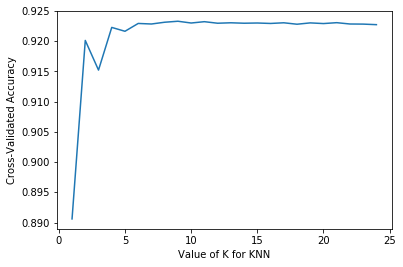

In [209]:


# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Model selection using Cross Validation

In [200]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, x, y, cv=10, scoring='accuracy').mean())

0.9229309945305415


In [201]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, x, y, cv=10, scoring='accuracy').mean())

0.9301561898635897


In [202]:
# 10-fold cross-validation with Decision Tree

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
print(cross_val_score(DTC, x, y, cv=10, scoring='accuracy').mean())

0.8982447226450498


In [203]:
# 10-fold cross-validation with Random Forest

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100)
print(cross_val_score(RFC, x, y, cv=10, scoring='accuracy').mean())

0.9344255836685991


In [204]:
# 10-fold cross-validation XGBoost
from xgboost.sklearn import XGBClassifier
XGBC = XGBClassifier(max_depth=3,n_estimator=100,learning_rate=0.5)
print(cross_val_score(XGBC, x, y, cv=10, scoring='accuracy').mean())

0.9422894351688715
